In [10]:
import datetime
from resnet18 import *
from utils import *
setup_seed(6666)


train_loader = load_data()
iter_val_loader = load_data(train=False, n_items=512)
epoch_val_loader, test_loader = load_data(train=False)

net = PlainNet().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=8, min_lr=1e-4)

loss_list = []
train_err = []
val_err = []

start_time = datetime.datetime.now()
for epoch in range(32):
    acc = train_model(epoch, (train_loader, iter_val_loader, epoch_val_loader), (loss_list, train_err, val_err), (net, criterion, optimizer))
    scheduler.step(acc)
end_time = datetime.datetime.now()
print('Training time:%d' % (end_time - start_time).seconds)

0	0	loss: 2.307021141052246	lr: 0.01000
train acc: 0.10156	 validation acc: 0.09375
0	50	loss: 1.7211993932724	lr: 0.01000
train acc: 0.34375	 validation acc: 0.32031
0	100	loss: 1.587375521659851	lr: 0.01000
train acc: 0.38281	 validation acc: 0.43750
0	150	loss: 1.4377588033676147	lr: 0.01000
train acc: 0.46875	 validation acc: 0.44922
0	200	loss: 1.4901773929595947	lr: 0.01000
train acc: 0.47656	 validation acc: 0.42578
0	250	loss: 1.4250984191894531	lr: 0.01000
train acc: 0.50000	 validation acc: 0.47070
0	300	loss: 1.2493841648101807	lr: 0.01000
train acc: 0.50781	 validation acc: 0.53906
0	350	loss: 1.2981077432632446	lr: 0.01000
train acc: 0.46875	 validation acc: 0.53711
epoch:   0	epoch acc: 0.5596354166666667
1	0	loss: 1.139835000038147	lr: 0.01000
train acc: 0.60938	 validation acc: 0.54688
1	50	loss: 1.119908094406128	lr: 0.01000
train acc: 0.57031	 validation acc: 0.57617
1	100	loss: 1.1277693510055542	lr: 0.01000
train acc: 0.57812	 validation acc: 0.54688
1	150	loss: 1.0

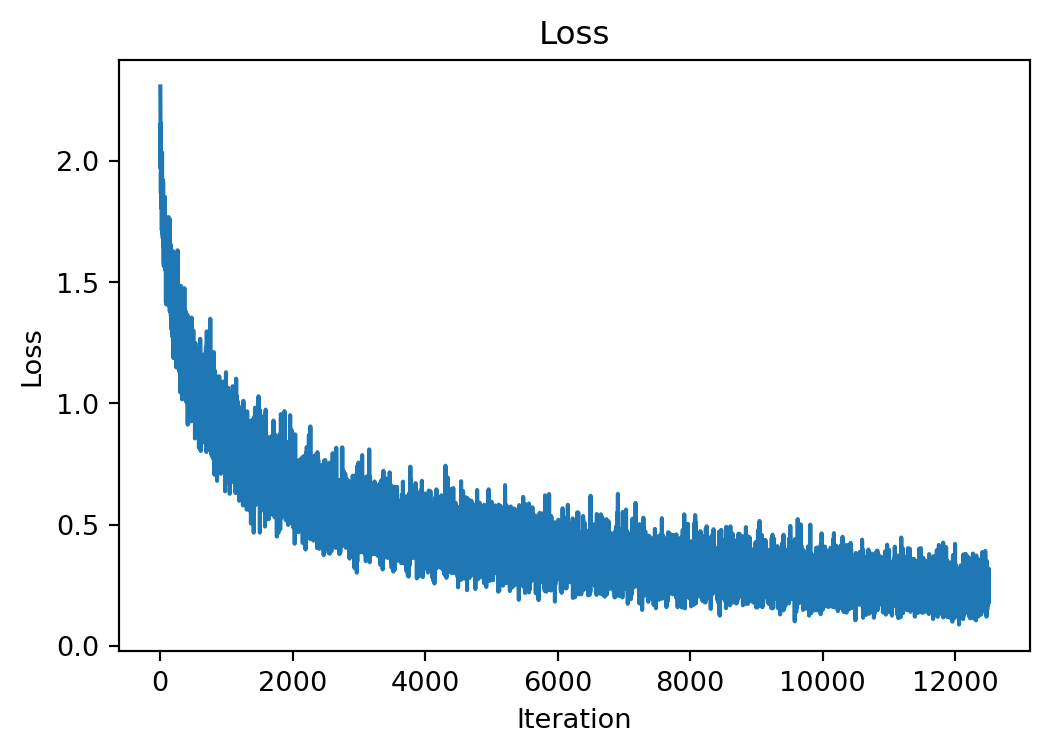

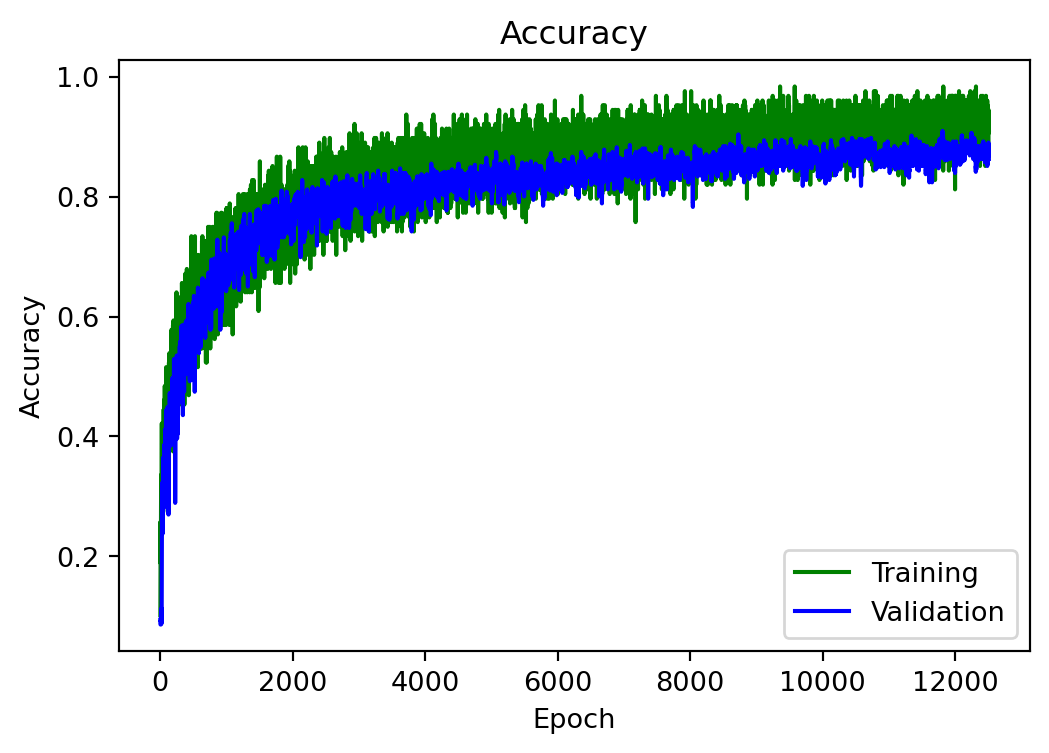

ILV: {'loss': 0.004506987361033778, 'train': 0.006802205041860831, 'val': 0.006087299494653914}
EFR: {'loss': 0.021704751765275653, 'train': 0.025363308039991705, 'val': 0.0034729914607169263}


In [11]:
draw_loss(loss_list)
draw_acc(train_err, val_err)

loss_list = [i.item() for i in loss_list]
ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
print(f'ILV: {ILV}')
print(f'EFR: {EFR}')

In [5]:
torch.save(loss_list, './no-shortcut/loss_list')
torch.save(train_err, './no-shortcut/train_err')
torch.save(val_err, './no-shortcut/val_err')
torch.save(net.state_dict(), './no-shortcut/param.pth')

In [9]:
acc = get_val_acc(net, epoch_val_loader)
print(f"Test accuracy: {acc}")

Test accuracy: 0.10169270833333334
